## Assignment - Multilinear Regression (Toyota Corolla)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
data = pd.read_csv("Toyoto_corrola.csv")
data.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [12]:
data_1.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


In [13]:
#Understanding the dataframe
data_1.shape

(1436, 8)

In [14]:
# information of the data
data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [15]:
# description of the data
data_1.describe()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


## Cleaning the Data

In [9]:
# dropping car_ID based on business knowledge
data_1=data.drop(['Model', 'Id'], axis = 1)

In [10]:
# Datatypes
data_1.dtypes

Price        int64
Age_08_04    int64
KM           int64
HP           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
dtype: object

(1436, 8)

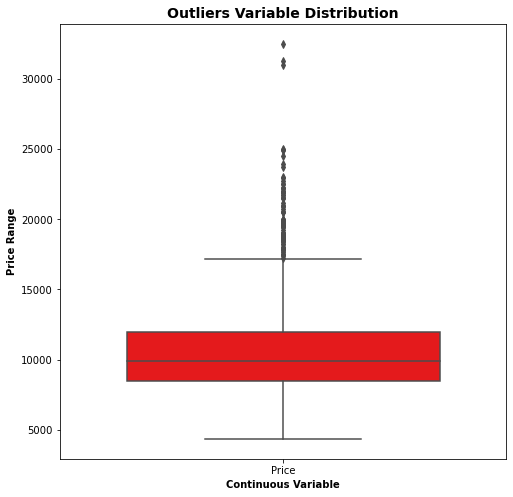

In [11]:

# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['Price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data_1[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data_1.shape

Insights: 
There are some price ranges above 17000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

In [16]:
# checking for duplicates
data_1.loc[data_1.duplicated()]

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
113,24950,8,13253,116,5,4,5,1320


In [17]:
data_1=data_1.drop_duplicates()


## Data Visualization

Text(0, 0.5, 'Count of Cars')

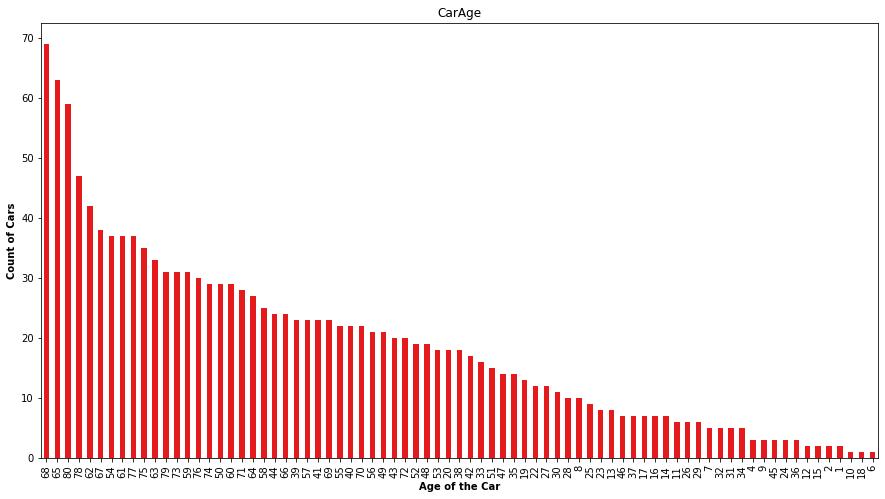

In [18]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=data_1['Age_08_04'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarAge')
plt.xlabel("Age of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')


Insights:
    More number of cars are of age 68 and very less number of car is of age 6. Average age of car is 55.947075

Visualizing the distribution of car prices.



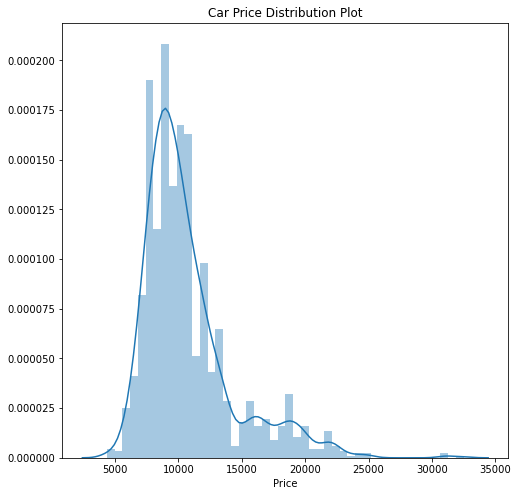

In [19]:
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(data_1['Price'])


Insights:The plots seems to be right skewed, the prices of almost all cars looks like less than 15000.

Pairplot of all the numeric variables

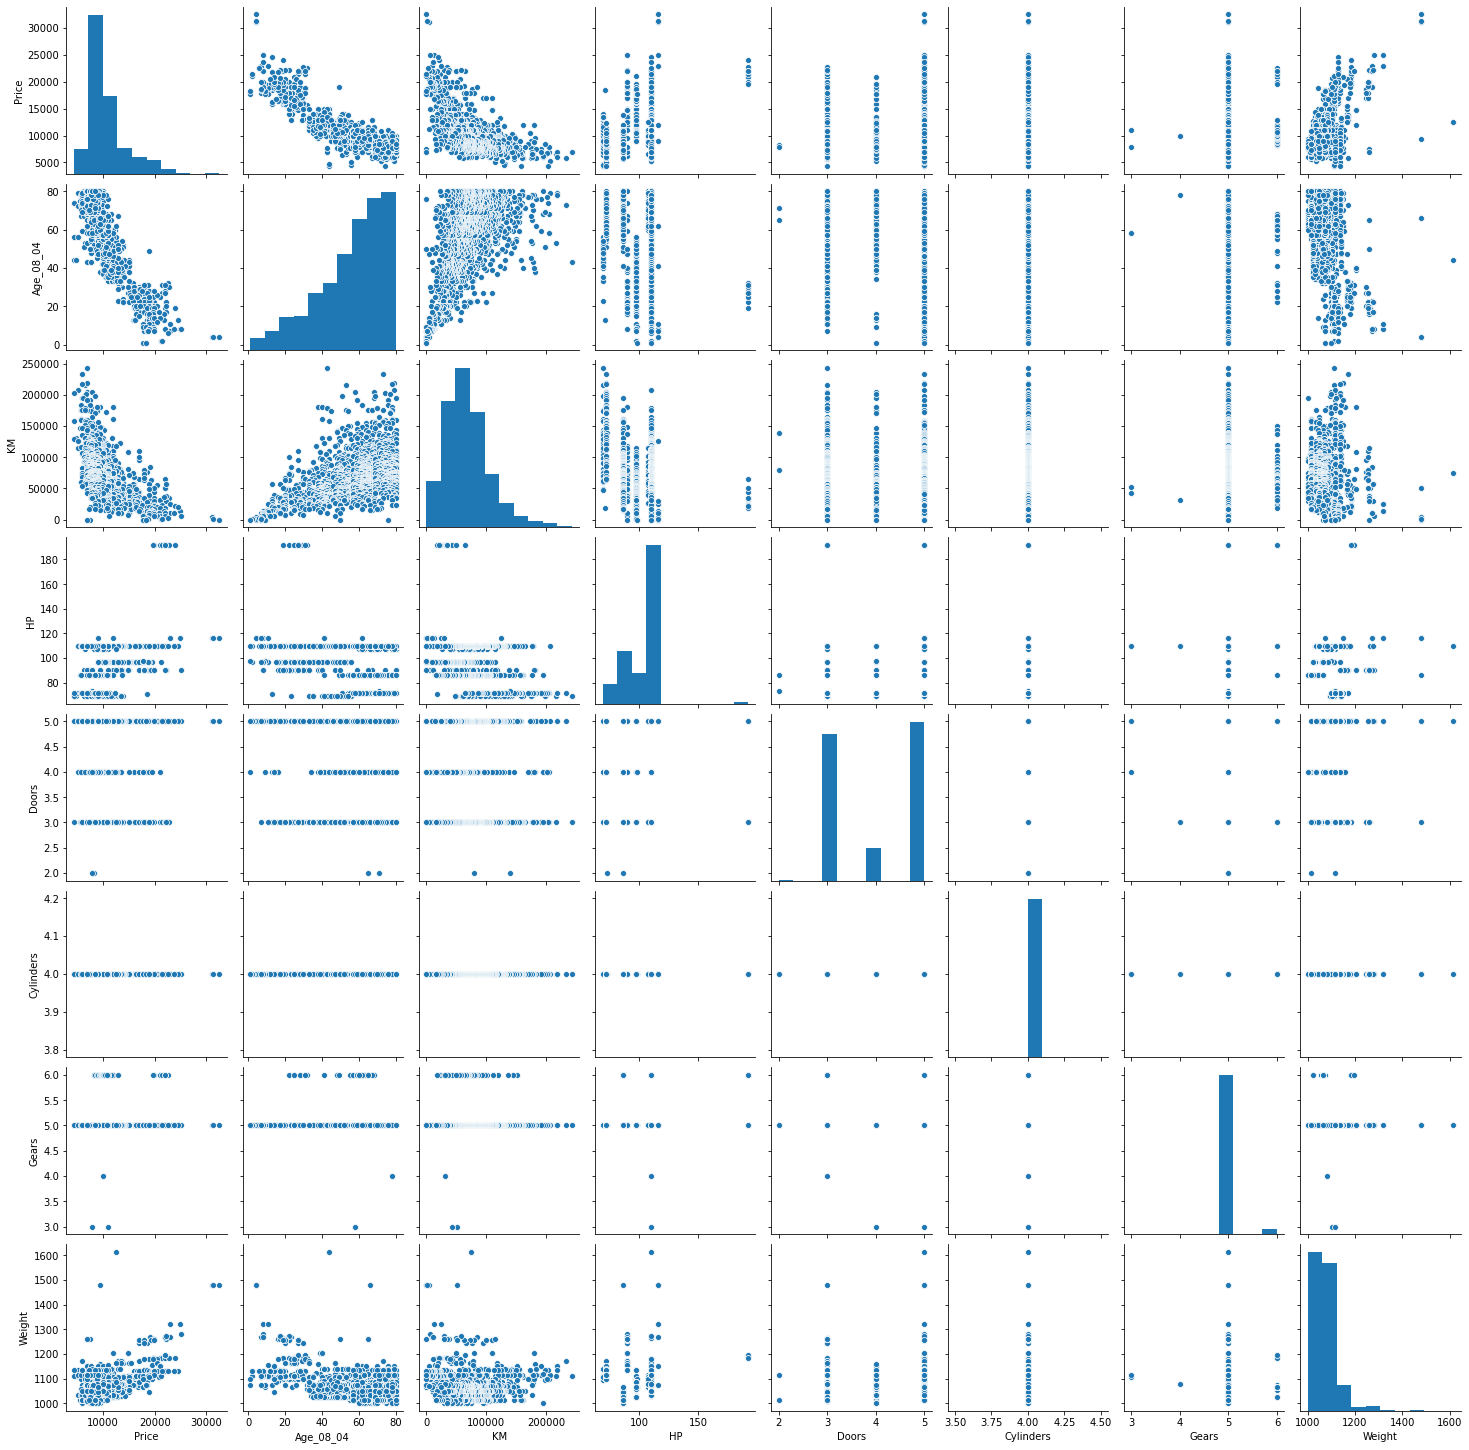

In [21]:
ax = sns.pairplot(data_1)


Insights: HP,Doors,Cylinders,Gears,Weight doesn't show any significant trend with price. KM,age - seem to have a significant negative correlation with price.

Visualising few more Categorical Variables Boxplot of all the categorical variables

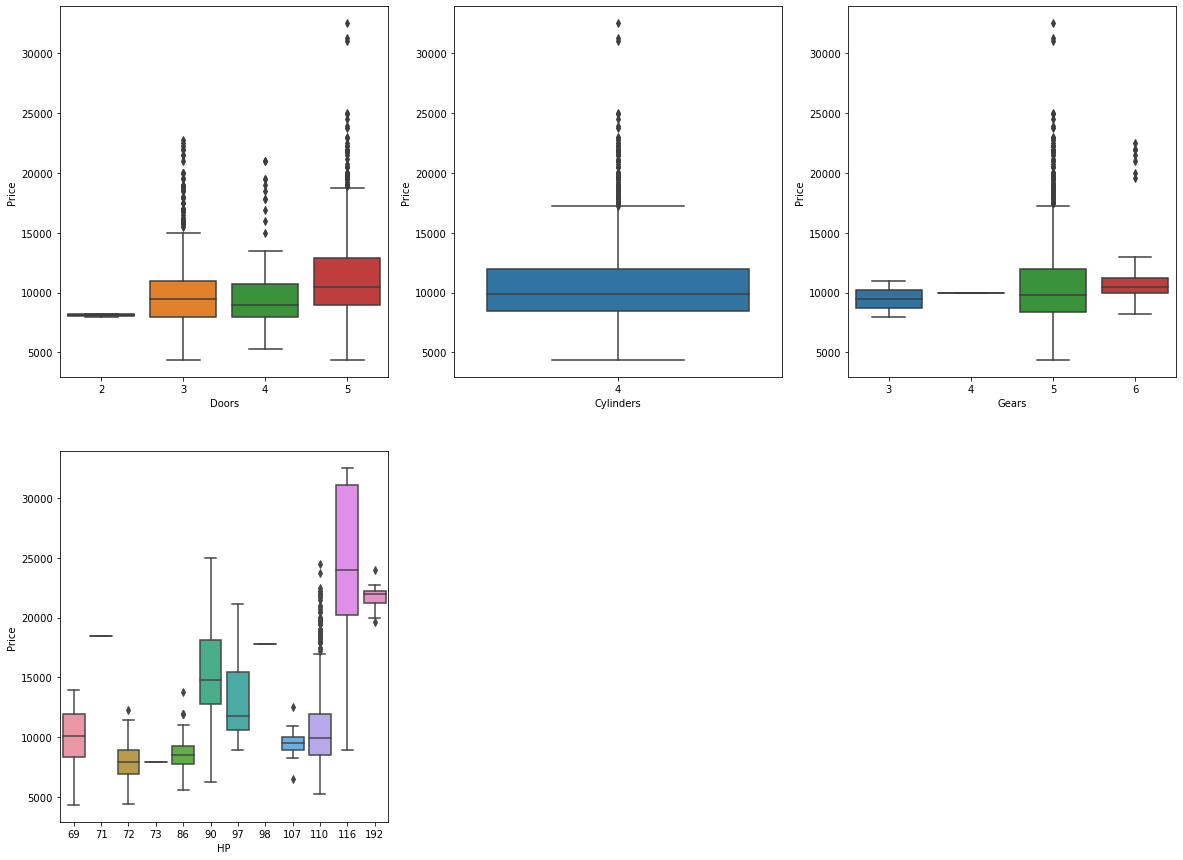

In [22]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'Doors', y = 'Price', data = data_1)
plt.subplot(2,3,2)
sns.boxplot(x = 'Cylinders', y = 'Price', data = data_1)
plt.subplot(2,3,3)
sns.boxplot(x = 'Gears', y = 'Price', data = data_1)
plt.subplot(2,3,4)
sns.boxplot(x = 'HP', y = 'Price', data = data_1)
plt.show()


Insights The cars with Doors 5 are costly than with the 4 and 3.Cars with doors 3 and 4 are almost equal. Doors isn't affecting the price much. For all the records no of cylinders are 4. The selling for cars with gears 5 are more sold than 3,4,6. The price of car is directly proportional to the HP in most cases.

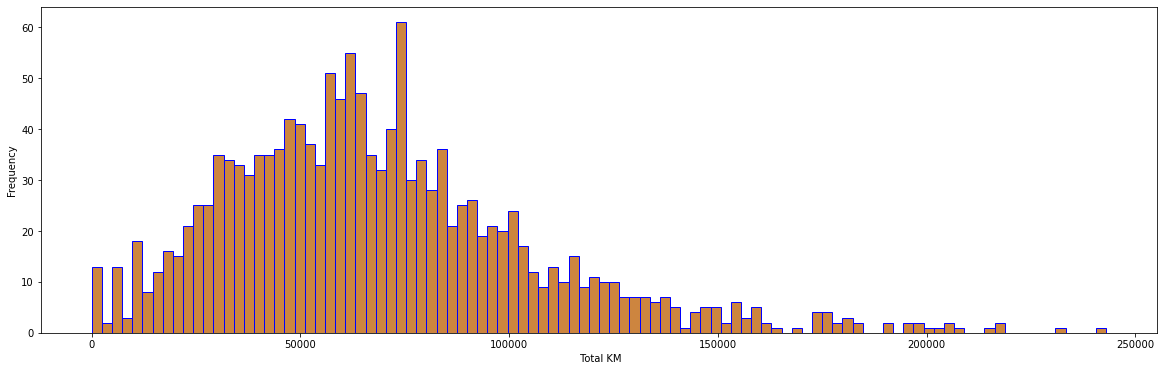

In [23]:

plt.figure(figsize=(20, 6))
plt.hist(data_1['KM'],facecolor ="peru",edgecolor ="blue",bins =100)
plt.ylabel("Frequency");
plt.xlabel(" Total KM")
plt.show()

Insights: Mass concentration of vehicles covered the distance between 50,000- 1,00,000



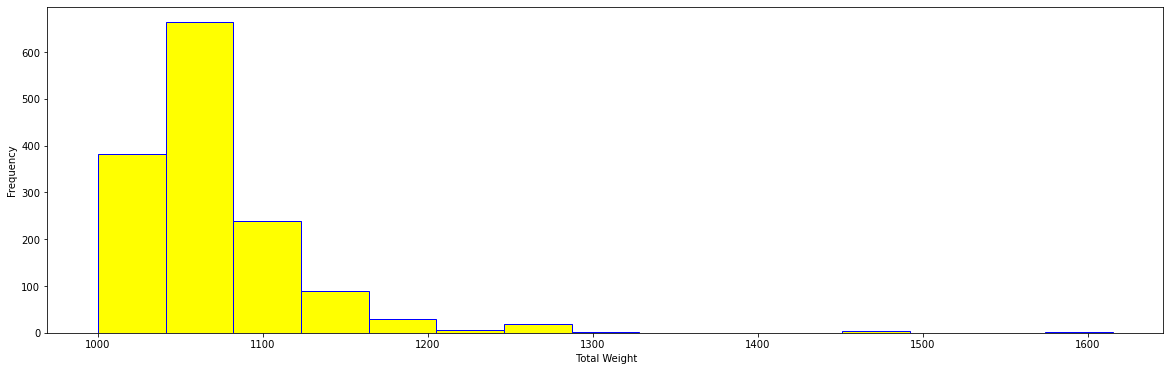

In [24]:

plt.figure(figsize=(20, 6))
plt.hist(data_1['Weight'],facecolor ="yellow",edgecolor ="blue",bins =15)
plt.ylabel("Frequency");
plt.xlabel(" Total Weight")
plt.show()

Insights: The mass concentration of weight of vehicle is between 1000 - 1100 There are less no of vehicle with weight more than 1150



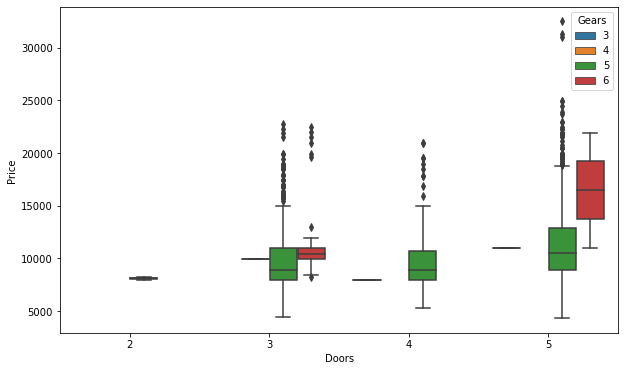

In [25]:

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Doors', y = 'Price', hue = 'Gears', data = data_1)
plt.show()

Insights: Cars with doors 5, the price of car with gear 5 is lesser than car with gear 6. Cars with doors 4, there with no car with gear other than 5.

Average Price:

<Figure size 1440x288 with 0 Axes>

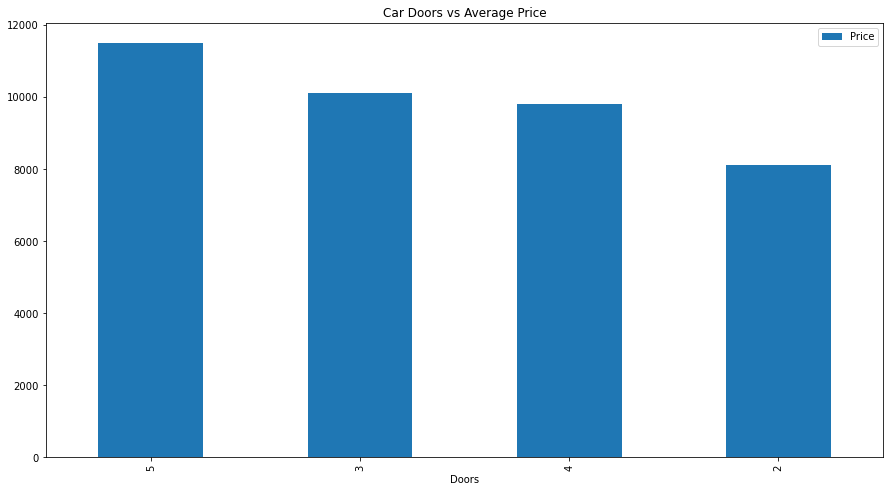

In [26]:

plt.figure(figsize=(20, 4))

df_autox = pd.DataFrame(data_1.groupby(['Doors'])['Price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Doors vs Average Price')
plt.show()

Insight: The average price of car with Doors 5 is highest and gears with 2 is lowest.

## Significant variables after Visualization

->Age_08_04

->KM

->Doors

->Cylinders

->Gears

->Weight

## Data Preparation

In [28]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(data_1['Doors'])
dummies.shape

(1435, 4)

In [29]:
dummies = pd.get_dummies(data_1['Gears'])
dummies.shape

(1435, 4)

In [30]:

data_2=pd.get_dummies(data_1,columns=['Doors','Gears'])

In [31]:
data_2.head()

,Price,Age_08_04,KM,HP,Cylinders,Weight,Doors_2,Doors_3,Doors_4,Doors_5,Gears_3,Gears_4,Gears_5,Gears_6
0,13500,23,46986,90,4,1165,0,1,0,0,0,0,1,0
1,13750,23,72937,90,4,1165,0,1,0,0,0,0,1,0
2,13950,24,41711,90,4,1165,0,1,0,0,0,0,1,0
3,14950,26,48000,90,4,1165,0,1,0,0,0,0,1,0
4,13750,30,38500,90,4,1170,0,1,0,0,0,0,1,0


## Splitting the Data into Training and Testing Sets

In [33]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data_2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
df_train.head()

,Price,Age_08_04,KM,HP,Cylinders,Weight,Doors_2,Doors_3,Doors_4,Doors_5,Gears_3,Gears_4,Gears_5,Gears_6
421,8950,53,90200,97,4,1025,0,1,0,0,0,0,1,0
1422,7600,78,36000,110,4,1050,0,1,0,0,0,0,1,0
385,9900,51,146736,110,4,1080,0,0,0,1,0,0,1,0
752,8450,65,80439,110,4,1035,0,0,1,0,0,0,1,0
972,9500,66,47237,110,4,1050,0,1,0,0,0,0,1,0


## Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling: ->Min-Max scaling ->Standardisation (mean-0, sigma-1)

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.StandardScaler()

In [38]:

import warnings
warnings.filterwarnings("ignore")
sig_num_col=['Age_08_04','KM','HP','Cylinders','Weight','Price']
df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [39]:
df_train.head()

,Price,Age_08_04,KM,HP,Cylinders,Weight,Doors_2,Doors_3,Doors_4,Doors_5,Gears_3,Gears_4,Gears_5,Gears_6
421,-0.471215,-0.175105,0.563958,-0.271402,0.0,-0.875104,0,1,0,0,0,0,1,0
1422,-0.849527,1.177660,-0.880582,0.569410,0.0,-0.406895,0,1,0,0,0,0,1,0
385,-0.204996,-0.283326,2.070757,0.569410,0.0,0.154957,0,0,0,1,0,0,1,0
752,-0.611331,0.474222,0.303808,0.569410,0.0,-0.687820,0,0,1,0,0,0,1,0
972,-0.317088,0.528333,-0.581093,0.569410,0.0,-0.406895,0,1,0,0,0,0,1,0


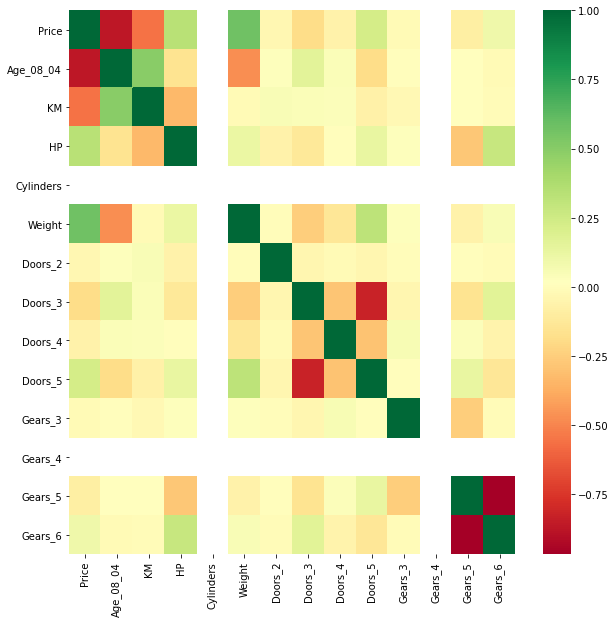

In [40]:

# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (10, 10))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

Let's see scatterplot for few correlated variables vs price.



In [41]:
df_train.corr()

,Price,Age_08_04,KM,HP,Cylinders,Weight,Doors_2,Doors_3,Doors_4,Doors_5,Gears_3,Gears_4,Gears_5,Gears_6
Price,1.000000,-0.872576,-0.557898,0.332461,NaN,0.574207,-0.031694,-0.190267,-0.061369,0.228100,-0.014792,NaN,-0.088781,0.095636
Age_08_04,-0.872576,1.000000,0.493329,-0.156051,NaN,-0.467922,0.028439,0.161105,0.041465,-0.187179,0.004264,NaN,0.016612,-0.018293
KM,-0.557898,0.493329,1.000000,-0.330439,NaN,-0.016277,0.048263,0.042177,0.038694,-0.068842,-0.025993,NaN,0.012995,-0.006502
HP,0.332461,-0.156051,-0.330439,1.000000,NaN,0.117863,-0.062693,-0.126737,0.003500,0.129851,0.025439,NaN,-0.275923,0.278214
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.574207,-0.467922,-0.016277,0.117863,NaN,1.000000,-0.005628,-0.244607,-0.131422,0.320649,0.031606,NaN,-0.061519,0.055126
Doors_2,-0.031694,0.028439,0.048263,-0.062693,NaN,-0.005628,1.000000,-0.039862,-0.014275,-0.041414,-0.001996,NaN,0.007975,-0.007705
Doors_3,-0.190267,0.161105,0.042177,-0.126737,NaN,-0.244607,-0.039862,1.000000,-0.285073,-0.827058,-0.039862,NaN,-0.153693,0.169353
Doors_4,-0.061369,0.041465,0.038694,0.003500,NaN,-0.131422,-0.014275,-0.285073,1.000000,-0.296172,0.062777,NaN,0.037170,-0.055103
Doors_5,0.228100,-0.187179,-0.068842,0.129851,NaN,0.320649,-0.041414,-0.827058,-0.296172,1.000000,0.003392,NaN,0.130811,-0.136011


<Figure size 720x216 with 0 Axes>

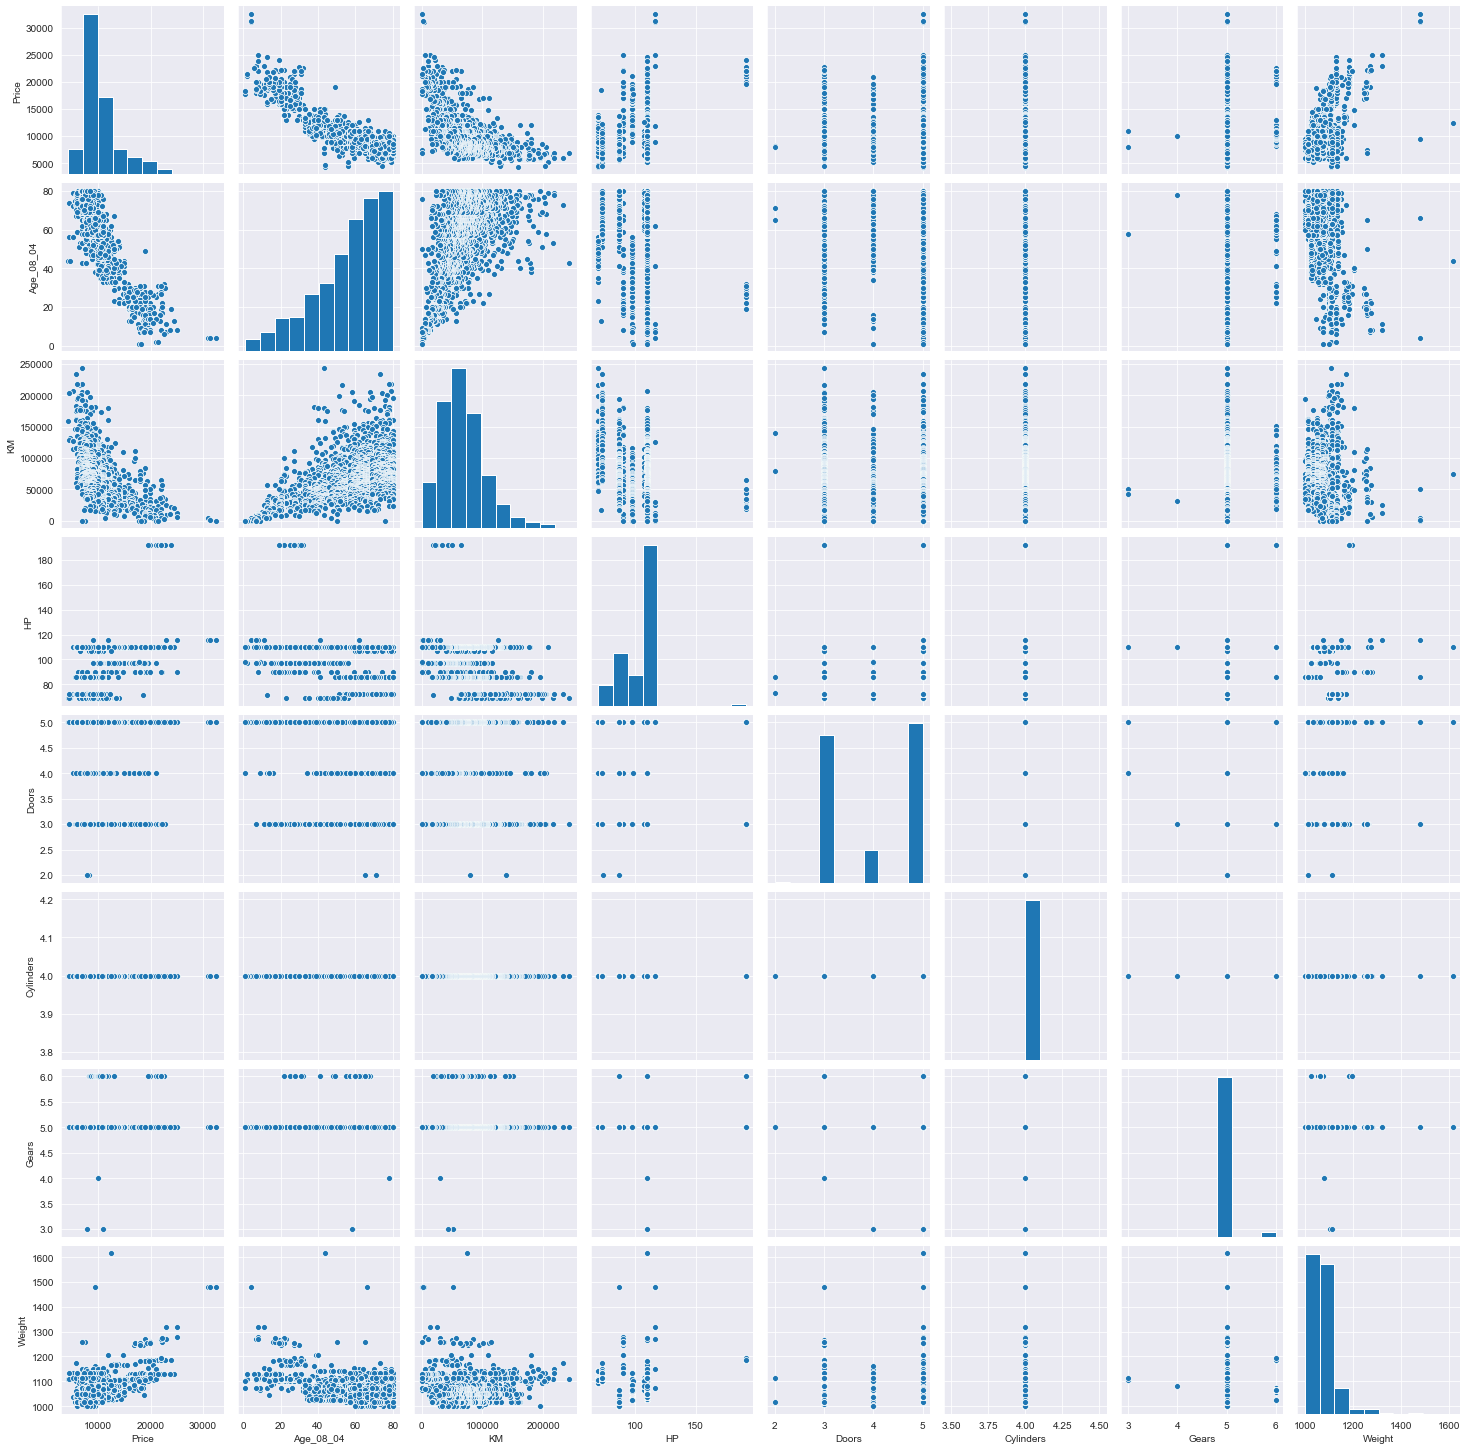

In [42]:
import seaborn as sns
fig = plt.figure(figsize=(10,3))
sns.set_style(style='darkgrid')
sns.pairplot(data_1)

Dividing into X and Y sets for the model building



In [43]:

y_train = df_train.pop('Price')
X_train = df_train

## Building a Linear Model

In [44]:
X_train_1 = X_train['Age_08_04']

In [45]:

import statsmodels.api as sm
# Add a constant
X_train_1c = sm.add_constant(X_train_1)
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [46]:
# Check parameters created
lr_1.params

const        1.804112e-16
Age_08_04   -8.725756e-01
dtype: float64

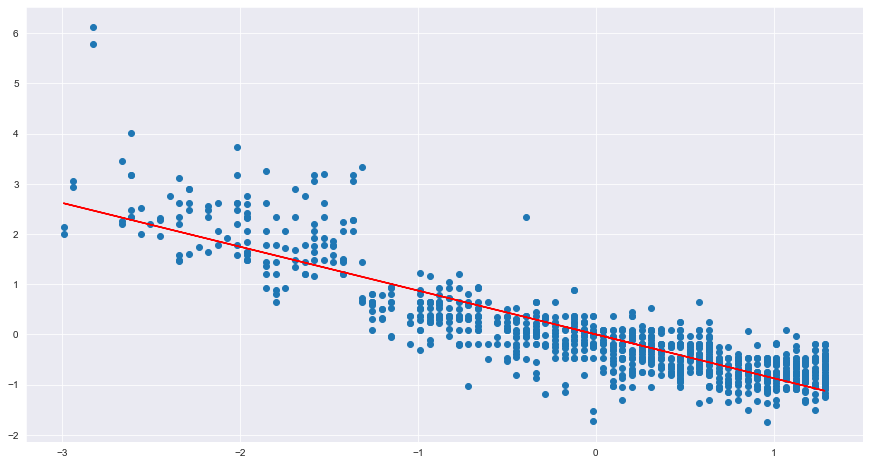

In [47]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], -8.735410e-01*X_train_1c.iloc[:, 1]+-6.765422e-17, 'r')
plt.show()

In [48]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     3197.
Date:                Thu, 20 May 2021   Prob (F-statistic):          4.83e-314
Time:                        14:38:20   Log-Likelihood:                -705.29
No. Observations:                1004   AIC:                             1415.
Df Residuals:                    1002   BIC:                             1424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.015   1.17e-14      1.0

Adding another variable The R-squared value obtained is 0.763 . Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. KM.

In [49]:
X_train_2 = X_train[['Age_08_04', 'KM']]

In [50]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)
# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [51]:
lr_2.params


const        1.804112e-16
Age_08_04   -7.894887e-01
KM          -1.684210e-01
dtype: float64

In [52]:
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1804.
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        14:39:20   Log-Likelihood:                -657.98
No. Observations:                1004   AIC:                             1322.
Df Residuals:                    1001   BIC:                             1337.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.015   1.22e-14      1.0

The R-squared incresed from 0.763 to 0.785

In [53]:
X_train_3 = X_train[['Age_08_04', 'KM','Weight']]

In [54]:

# Add a constant
X_train_3c = sm.add_constant(X_train_3)
# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [55]:
lr_3.params

const        1.804112e-16
Age_08_04   -6.189707e-01
KM          -2.479759e-01
Weight       2.805408e-01
dtype: float64

In [56]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1744.
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        14:41:03   Log-Likelihood:                -506.12
No. Observations:                1004   AIC:                             1020.
Df Residuals:                    1000   BIC:                             1040.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.013   1.42e-14      1.0


We have achieved a R-squared of 0.854 by manually picking the highly correlated variables. Now lets use RFE to select the independent variables which accurately predicts the dependent variable price.

In [57]:

X_train_4 = X_train[['Age_08_04', 'KM','Weight','HP']]

In [60]:

# Add a constant
X_train_4c = sm.add_constant(X_train_4)
# Create a third fitted model
lr_4 = sm.OLS(y_train, X_train_4c).fit()

In [61]:
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1488.
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        14:42:28   Log-Likelihood:                -450.76
No. Observations:                1004   AIC:                             911.5
Df Residuals:                     999   BIC:                             936.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.012    1.5e-14      1.0

In [62]:
X_train_4 = X_train[['Age_08_04', 'KM','Weight','HP']]

In [63]:
import statsmodels.formula.api as smf 
rsq_age = smf.ols('Age_08_04~KM+HP+Weight',data=X_train_4).fit().rsquared  
vif_age = 1/(1-rsq_age) # 16.33

rsq_KM = smf.ols('KM~Age_08_04+HP+Weight',data=X_train_4).fit().rsquared  
vif_KM = 1/(1-rsq_KM) # 564.98

rsq_HP = smf.ols('HP~Age_08_04+KM+Weight',data=X_train_4).fit().rsquared  
vif_HP = 1/(1-rsq_HP) #  564.84


rsq_weight = smf.ols('Weight~Age_08_04+HP+KM',data=X_train_4).fit().rsquared  
vif_weight = 1/(1-rsq_weight) #  16.35

           # Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.847933
1,KM,1.599758
2,HP,1.147012
3,weight,1.418620


In [64]:
X_train_5 = X_train[['Age_08_04', 'KM','Weight','HP','Cylinders']]

In [65]:
# Add a constant
X_train_5c = sm.add_constant(X_train_5)
# Create a third fitted model
lr_5 = sm.OLS(y_train, X_train_5c).fit()

In [66]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1488.
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        14:43:55   Log-Likelihood:                -450.76
No. Observations:                1004   AIC:                             911.5
Df Residuals:                     999   BIC:                             936.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.012    1.5e-14      1.0

In [67]:
X_train_5 = X_train[['Age_08_04', 'KM','Weight','HP','Cylinders']]


In [68]:
import statsmodels.formula.api as smf 
rsq_age = smf.ols('Age_08_04~KM+HP+Weight+Cylinders',data=X_train_5).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_KM = smf.ols('KM~Age_08_04+HP+Weight+Cylinders',data=X_train_5).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age_08_04+KM+Weight+Cylinders',data=X_train_5).fit().rsquared  
vif_HP = 1/(1-rsq_HP)


rsq_weight = smf.ols('Weight~Age_08_04+HP+KM+Cylinders',data=X_train_5).fit().rsquared  
vif_weight = 1/(1-rsq_weight) 

rsq_Cylinders = smf.ols('Cylinders~Age_08_04+HP+KM+Weight',data=X_train_5).fit().rsquared  
vif_Cylinders=1/(1-rsq_Cylinders)

           # Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','weight','Cylinders'],'VIF':[vif_age,vif_KM,vif_HP,vif_weight,vif_Cylinders]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.847933
1,KM,1.599758
2,HP,1.147012
3,weight,1.418620
4,Cylinders,NaN


Equation of Line to predict the Car prices values. Carprice = −1.804e-16-0.6339×Age_08-0.1952×KM+0.2581×Weight+0.1386×HP

Model 5 Conclusions: R-sqaured and Adjusted R-squared - 0.856 and 0.856 . p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of Model), let us plot the histogram of it.

In [72]:
# Predicting the price of training set.
y_train_price2 = lr_4.predict(X_train_4c)


Text(0.5, 0, 'Errors')

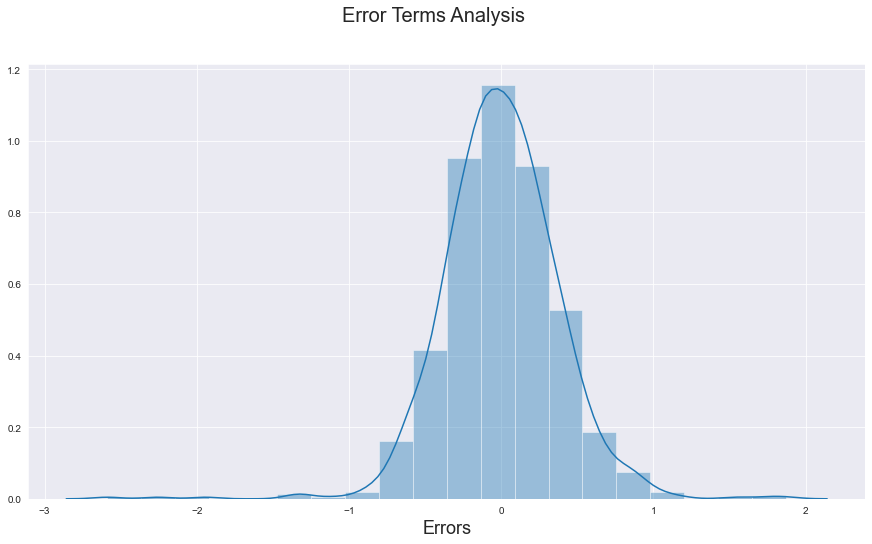

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price2), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the model.

In [77]:
import warnings
warnings.filterwarnings("ignore")
df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(431, 14)

In [78]:
y_test = df_test.pop('Price')
X_test = df_test

In [79]:
# Adding constant
X_test_1 = sm.add_constant(X_test)
X_test_new = X_test_1[X_train_4c.columns]

In [80]:
X_test = df_test
X_test_2 = X_test_1[X_train_5c.columns]

In [81]:

# Making predictions using the final model
y_pred2 = lr_5.predict(X_test_2)


Text(0, 0.5, 'y_pred2')

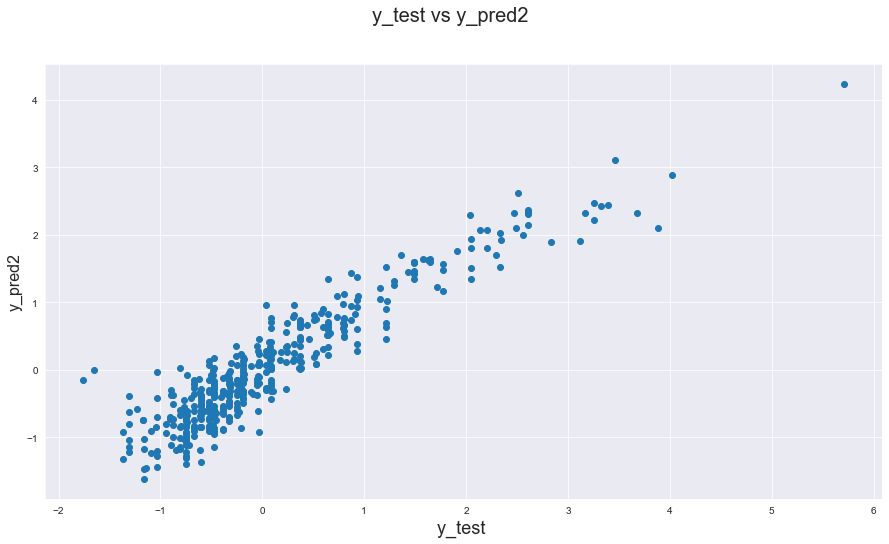

In [82]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred2', fontsize=16)

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.8677729378304024